# 02 项目实战 - IBM股票价格数据离线分析
---

**实战内容**：

本节以IBM股票价格数据离线分析为例，学习使用Hadoop大数据平台和Python、pandas等工具进行数据分析的整个方法和流程。

## 分析目标

### IBM股票价格数据

#### Yahoo财经IBM股票价格数据来源：
* 历史股票价格数据：https://finance.yahoo.com/quote/IBM/history?p=IBM
* 数据字段信息：日期、开盘价、最高价、最低价、收盘价、调整的收益盘和交易量，使用逗号分隔(Date,Open,High,Low,Close,AdjClose,Volume)

#### 数据分析需求：
* 计算股票价格变化的日内历史百分比
* 计算公式：开盘价和收盘价计算一日价格的变化 = (开盘价 - 收盘价) / 开盘价，统计每日变化百分比的总数

#### 可视化展示
* 绘制分析分析结果柱状图：读入输出的每一行，将结果分隔为x和y值的列表，然后使用matplotlib的bar函数进行绘图，宽度(width)缩小为0.1

## 分析过程

### 1. 下载数据

使用浏览器或者使用wget命令将IBM股票价格数据下载到本地服务器（或hadoop的namenode，如master）中：

In [36]:
!wget http://www.baidu.com

--2019-08-12 20:38:53--  http://www.baidu.com/
正在解析主机 www.baidu.com (www.baidu.com)... 220.181.38.150, 220.181.38.149
正在连接 www.baidu.com (www.baidu.com)|220.181.38.150|:80... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度：2381 (2.3K) [text/html]
正在保存至: “index.html”

index.html          100%[===================>]   2.33K  --.-KB/s  用时 0.003s    

2019-08-12 20:38:53 (888 KB/s) - 已保存 “index.html” [2381/2381])



In [19]:
url = 'https://query1.finance.yahoo.com/v7/finance/download/IBM?\
period1=1534035744&period2=1565571744&\
interval=1d&events=history&crumb=h3f81hxI4MP'
user_agent='"Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US)\
AppleWebKit/534.16 (KHTML, like Gecko) \
Chrome/10.0.648.204 Safari/534.16"'
!wget -O -v --user-agent $user_agent ./ibm_stork.csv $url

In [37]:
!ls -l

total 2168
-rw-r--r--  1 xiaobai  staff   31435  8 11 16:40 Docker_Hadoop_Cluster.ipynb
-rw-r--r--  1 xiaobai  staff     430  8 11 15:20 Dockerfile
-rw-r--r--  1 xiaobai  staff  895558  8 12 20:07 ch01.ipynb
-rw-r--r--  1 xiaobai  staff   57958  8 12 20:36 ch02.ipynb
drwxr-xr-x  4 xiaobai  staff     128  8 11 20:20 conf
drwxr-xr-x  9 xiaobai  staff     288  8 12 20:24 data
-rw-r--r--@ 1 xiaobai  staff    3435  8 11 20:29 docker-compose.yml
drwxr-xr-x  4 xiaobai  staff     128  8 11 18:05 hadoop
-rw-r--r--@ 1 xiaobai  staff    1189  8 11 20:13 hadoop.env
-rw-r--r--@ 1 xiaobai  staff    2381  1 23  2017 index.html
drwxr-xr-x  2 xiaobai  staff      64  8 11 20:19 input_files
drwxr-xr-x  2 xiaobai  staff      64  8 11 20:19 jars
-rw-r--r--  1 xiaobai  staff   84452  7 31 23:26 pandas-tutorial.ipynb
-rwxr-xr-x  1 xiaobai  staff     568  8 12 16:42 stock_mapper.py
-rwxr-xr-x  1 xiaobai  staff     758  8 12 16:43 stock_reducer.py
-rwxr-xr-x  1 xiaobai  staff     603  8 11 17:39 word_count_map

若无法用wget下载，改用浏览器下载，并保存到./data目录下

In [22]:
!ls -l data/

total 16064
-rw-r--r--@ 1 xiaobai  staff    18558  8 12 09:04 IBM.csv
-rw-r--r--@ 1 xiaobai  staff  2377193  8 11 21:42 gone_with_wind.txt
-rw-r--r--@ 1 xiaobai  staff   674570  8 11 18:19 pg20417.txt
-rw-r--r--@ 1 xiaobai  staff  1586393  8 11 18:20 pg4300.txt
-rw-r--r--@ 1 xiaobai  staff  1428841  8 11 18:20 pg5000.txt


In [23]:
# 改名
!mv data/IBM.csv data/ibm_stock.csv

In [24]:
!ls -l data/

total 16064
-rw-r--r--@ 1 xiaobai  staff  2377193  8 11 21:42 gone_with_wind.txt
-rw-r--r--@ 1 xiaobai  staff    18558  8 12 09:04 ibm_stock.csv
-rw-r--r--@ 1 xiaobai  staff   674570  8 11 18:19 pg20417.txt
-rw-r--r--@ 1 xiaobai  staff  1586393  8 11 18:20 pg4300.txt
-rw-r--r--@ 1 xiaobai  staff  1428841  8 11 18:20 pg5000.txt


In [28]:
# 显示后10行
!cat data/ibm_stock.csv | tail -n 10

2019-07-29,151.110001,151.479996,150.320007,150.880005,149.122940,2075500
2019-07-30,150.000000,150.399994,149.220001,149.770004,148.025864,2632700
2019-07-31,149.699997,150.179993,146.389999,148.240005,146.513687,3722900
2019-08-01,148.899994,152.820007,148.500000,150.320007,148.569458,6344000
2019-08-02,149.029999,152.949997,145.589996,147.250000,145.535202,8101700
2019-08-05,144.979996,145.100006,139.149994,140.759995,139.120789,7114900
2019-08-06,142.029999,142.470001,139.309998,140.729996,139.091141,5070700
2019-08-07,138.740005,139.580002,136.410004,139.110001,137.490005,5931900
2019-08-08,138.449997,140.419998,137.759995,140.100006,140.100006,5261100
2019-08-09,139.270004,139.309998,135.350006,136.130005,136.130005,5224000


In [1]:
# 显示前10行
!cat data/ibm_stock.csv | head -n 10

Date,Open,High,Low,Close,Adj Close,Volume
2018-08-13,144.149994,144.300003,142.529999,142.710007,136.054092,2858500
2018-08-14,143.000000,143.820007,142.929993,143.360001,136.673767,2860000
2018-08-15,142.550003,144.000000,142.000000,143.910004,137.198105,4241500
2018-08-16,144.369995,145.679993,144.369995,145.339996,138.561432,5250700
2018-08-17,144.789993,146.389999,144.690002,146.059998,139.247864,2678600
2018-08-20,146.369995,147.160004,146.149994,146.509995,139.676849,2499700
2018-08-21,147.000000,147.119995,145.889999,145.970001,139.162048,3106900
2018-08-22,146.009995,146.160004,145.190002,145.240005,138.466110,2389000
2018-08-23,145.039993,145.520004,144.750000,145.369995,138.590012,2220400


### 2. 编写脚本
#### mapper

将以下代码保存为stock_mapper.py文件：

In [2]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import sys

def main():
    # 从标准输入读取数据
    for line in sys.stdin:
        # Date,Open,High,Low,Close,Adj Close,Volume
        row = line.split(",")
        try:
            # 开盘价
            open_price = float(row[1])
            # 收盘价
            close_price = float(row[-3])

            # 计算价格变化百分比
            price_change = ((open_price - close_price) / open_price )*100

            percent = str(round(price_change, 2)) + "%"
            print('{0}\t{1}'.format(percent, 1))
        except Exception as e:
            print(e)
            continue
        
if __name__ == '__main__':
    main()

#### reducer
将以下代码保存为stock_reducer.py文件：

In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import sys
def main():
    # 定义变量存储 单词 和 词频
    current_word = None 
    current_count = 1

    for line in sys.stdin:
        # 读取mapper函数输出的结果
        word, count = line.strip().split("\t")

        # 判断当前是否存单词
        if current_word:
            if word == current_word:
                current_count += int(count)
            else:
                print('{0}\t{1}'.format(current_word, current_count))
                current_count = 1
        # 赋值当前单词
        current_word = word

    # 处理最后一行数据
    if current_count >= 1:
        print('{0}\t{1}'.format(current_word, current_count))

if __name__ == '__main__':
    main()

None	1


### 3. 本地测试

在提交MapReduce Job之前必须用少量数据进行本地测试，以发现和修改程序错误

In [2]:
!ls ./data

gone_with_wind.txt pg20417.txt        pg5000.txt
ibm_stock.csv      pg4300.txt


In [6]:
!chmod +x ./stock_mapper.py ./stock_reducer.py

In [38]:
input_file = './data/ibm_stock.csv'
mapper_script = './stock_mapper.py'
reducer_script = './stock_reducer.py'
!cat $input_file | $mapper_script | sort | $reducer_script | head -n 12

-0.01%	3
-0.02%	1
-0.03%	3
-0.04%	2
-0.06%	1
-0.07%	1
-0.09%	1
-0.1%	1
-0.11%	1
-0.14%	2
-0.17%	1
-0.2%	3


### 4. 在hadoop集群上运行脚本，处理数据

复制数据和脚本文件到hadoop集群master主机上

In [10]:
!docker cp ./data/ibm_stock.csv master:/root/

In [13]:
!docker cp ./stock_reducer.py master:/root/

In [14]:
!docker cp ./stock_mapper.py master:/root/

In [15]:
!docker exec master ls /root/

gone_with_wind.txt
ibm_stock.csv
jars
stock_mapper.py
stock_reducer.py
word_count_mapper.py
word_count_reducer.py


在master主机上传数据文件到hdfs中

In [16]:
!docker exec master hadoop fs -put /root/ibm_stock.csv /input/

创建MapReduce Job, 在hadoop集群上运行mapper和reducer

In [21]:
jarPath = '/usr/hadoop-2.8.3/share/hadoop/tools/lib/'
jarPath += 'hadoop-streaming-2.8.3.jar'
jarArgs = '-files /root/stock_mapper.py,/root/stock_reducer.py \
-mapper /root/stock_mapper.py \
-reducer /root/stock_reducer.py \
-input /input/ibm_stock.csv \
-output /output/ibm_stock_data'
# 启动两个任务执行MapReduce Job
!docker exec master hadoop jar $jarPath -D mapreduce.job.reduces=2 $jarArgs 

19/08/12 11:53:44 INFO Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id
19/08/12 11:53:44 INFO jvm.JvmMetrics: Initializing JVM Metrics with processName=JobTracker, sessionId=
19/08/12 11:53:44 INFO jvm.JvmMetrics: Cannot initialize JVM Metrics with processName=JobTracker, sessionId= - already initialized
19/08/12 11:53:44 INFO mapred.FileInputFormat: Total input files to process : 1
19/08/12 11:53:44 INFO mapreduce.JobSubmitter: number of splits:1
19/08/12 11:53:44 INFO Configuration.deprecation: mapred.reduce.tasks is deprecated. Instead, use mapreduce.job.reduces
19/08/12 11:53:45 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local2035810303_0001
19/08/12 11:53:45 INFO mapred.LocalDistributedCacheManager: Creating symlink: /tmp/hadoop-root/mapred/local/1565610825242/stock_mapper.py <- /usr/spark-2.3.0/stock_mapper.py
19/08/12 11:53:45 INFO mapred.LocalDistributedCacheManager: Localized file:/root/stock_mapper.py as file:/tmp/hado

In [22]:
!docker exec master hadoop fs -ls /output/ibm_stock

Found 2 items
-rw-r--r--   1 root root          0 2019-08-12 11:49 /output/ibm_stock/_SUCCESS
-rw-r--r--   1 root root       1465 2019-08-12 11:49 /output/ibm_stock/part-00000


In [24]:
!docker exec master hadoop fs -cat /output/ibm_stock/part-00000 | head -n 20

-0.01%	3
-0.02%	1
-0.03%	3
-0.04%	2
-0.06%	1
-0.07%	1
-0.09%	1
-0.1%	1
-0.11%	1
-0.14%	2
-0.17%	1
-0.2%	3
-0.21%	1
-0.23%	1
-0.24%	2
-0.25%	3
-0.26%	2
-0.27%	3
-0.28%	1
-0.29%	1


In [25]:
!docker exec master hadoop fs -ls /output/ibm_stock_data

Found 3 items
-rw-r--r--   1 root root          0 2019-08-12 11:53 /output/ibm_stock_data/_SUCCESS
-rw-r--r--   1 root root        690 2019-08-12 11:53 /output/ibm_stock_data/part-00000
-rw-r--r--   1 root root        775 2019-08-12 11:53 /output/ibm_stock_data/part-00001


In [27]:
data_file = '/output/ibm_stock_data/part-00001'
!docker exec master hadoop fs -cat $data_file | tail -n 10

1.91%	1
2.03%	1
2.12%	1
2.25%	1
2.32%	2
2.49%	1
2.52%	1
3.02%	1
3.26%	1
3.68%	1


### 5. 使用matplotlib对处理结果进行可视化

#### 下载处理结果到本地

In [32]:
file_src = '/output/ibm_stock/part-00000'
file_dst = '/root/ibm_stock_part-00000'
!docker exec master hadoop fs -get $file_src $file_dst

In [33]:
!docker cp master:/root/ibm_stock_part-00000 ./data/ibm_stock_part-00000

#### 编写可视化代码

Max:  4.22
Min:  -5.0


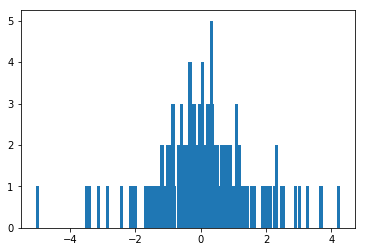

In [45]:
import matplotlib.pyplot as plt

# 从MapReduce统计分析结果文件读取数据
with open('data/ibm_stock_part-00000') as f:
    # 存储 x轴和y轴 数据
    x,y=[],[]

    # 一行一行读取数据  数据格式: -1.7% 144
    for line in f.readlines():
        # 按照制表符分割
        data=line.split("\t")
        # 存储 每日百分比数据 -> X轴
        x.append(float(data[0].strip('%')))
        # 存储 统计数 -> Y轴
        y.append(float(data[1]))
    print("Max: ",max(x))
    print("Min: ",min(x))

    # 绘制柱状图
    plt.bar(x,y, width=0.05)
    # 显示
    plt.show()